## Part1: Feature Engineering Polynormial Selection
## Part2: LASSO and RIDGE regression

In [1170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#### Load Data

In [1171]:
# Read CSV
wine_csv = 'winequality_merged.csv'

In [1172]:
wine = pd.read_csv('/Users/gracechongzuting/Desktop/winequality_merged.csv')

In [1173]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### Explore Data (Exploratory Data Analysis)

In [1174]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [1175]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

### hence, there are no null values, not showing object64, which is good. Now, we can start doing some correlation on FEATURE.

In [1176]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


In [1177]:
wine.corr()['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
red_wine               -0.119323
Name: quality, dtype: float64

In [1178]:
wine.shape

(6497, 13)

### 2. Set Target Variable

Create a target variable for wine quality.

<AxesSubplot:>

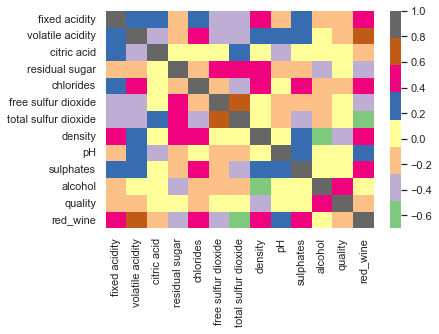

In [1179]:
sns.heatmap(wine.corr(),annot=False,cmap='Accent')

#### Plot diagonal Correlation Matrix.

<AxesSubplot:>

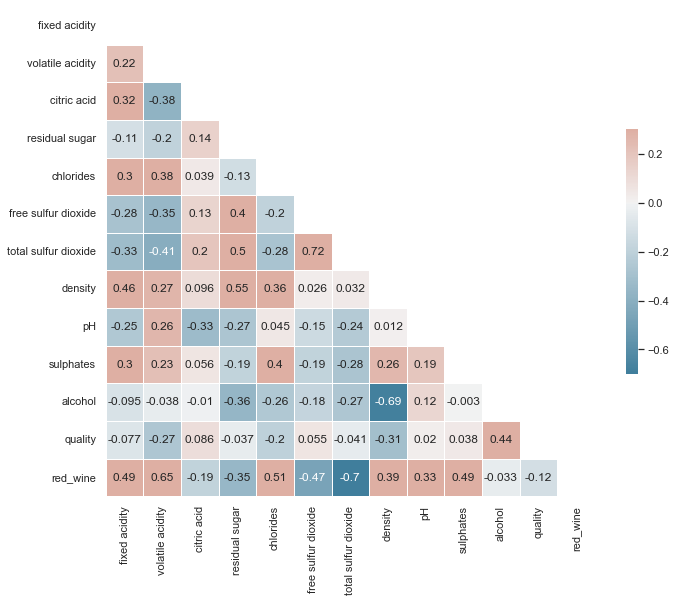

In [1180]:
sns.set_theme(style="white")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(wine.corr(), dtype = bool))  

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(wine.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)



### Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

<AxesSubplot:>

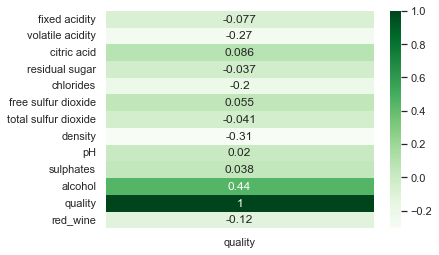

In [1181]:
sns.heatmap(wine.corr()[['quality']],annot=True,cmap='Greens')

### Create independent  (X matrix) and dependent variable (y vector)

In [1182]:

# Create X and y.
#X = wine.drop('quality', axis=1)
X_choose = ['alcohol','sulphates','citric acid','free sulfur dioxide','pH']
y = wine['quality']

In [1183]:
X_chosen = wine[X]
X_chosen.head()

,alcohol,sulphates,citric acid,free sulfur dioxide,pH
0,9.4,0.56,0.00,11.0,3.51
1,9.8,0.68,0.00,25.0,3.20
2,9.8,0.65,0.04,15.0,3.26
3,9.8,0.58,0.56,17.0,3.16
4,9.4,0.56,0.00,11.0,3.51


In [1184]:
X_train, X_test, y_train, y_test = train_test_split(X_chosen, y, test_size=0.35, random_state=42)

In [1185]:
lr = LinearRegression()

In [1186]:
lr.fit(X_train,y_train)

LinearRegression()

In [1187]:
lr.score(X_train, y_train)

0.22981788440613837

In [1188]:
lr.score(X_test, y_test)

0.21538218041327262

### instantitate Polynormial features to all 2 index terms.
- when considering all FEATURES.

In [1191]:
wine_poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [1193]:
# Fit and transform our X data.
X = wine.drop('quality', axis=1)
X_fit = wine_poly.fit_transform(X)

In [1194]:
wine_poly.get_feature_names(X.columns)

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'red_wine',
 'fixed acidity^2',
 'fixed acidity volatile acidity',
 'fixed acidity citric acid',
 'fixed acidity residual sugar',
 'fixed acidity chlorides',
 'fixed acidity free sulfur dioxide',
 'fixed acidity total sulfur dioxide',
 'fixed acidity density',
 'fixed acidity pH',
 'fixed acidity sulphates',
 'fixed acidity alcohol',
 'fixed acidity red_wine',
 'volatile acidity^2',
 'volatile acidity citric acid',
 'volatile acidity residual sugar',
 'volatile acidity chlorides',
 'volatile acidity free sulfur dioxide',
 'volatile acidity total sulfur dioxide',
 'volatile acidity density',
 'volatile acidity pH',
 'volatile acidity sulphates',
 'volatile acidity alcohol',
 'volatile acidity red_wine',
 'citric acid^2',
 'citric acid residual sugar',
 'citric acid chlorides',
 'citric acid free sulfur diox

In [1195]:
X_fit.shape

(6497, 90)

In [1196]:
X.shape

(6497, 12)

### 4. Using Linear Regression Create a Model and Test Score

In [1197]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.35, random_state=42)

In [1198]:
ss = StandardScaler()
Z_train= ss.fit_transform(X_train) 
Z_test= ss.transform(X_test)

In [1199]:
print(f'the shape of Z_train is {Z_train.shape}')
print(f'the shape of y_train is {y_train.shape}')
print(f'the shape of Z_test is {Z_test.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of Z_train is (4223, 90)
the shape of y_train is (4223,)
the shape of Z_test is (2274, 90)
the shape of y_test is (2274,)


In [1200]:
# Create a model for Linear Regression
wine_lr = LinearRegression()




In [1201]:
# Fit the model with the Training data
wine_lr.fit(Z_train,y_train)

LinearRegression()

In [1202]:
# Calculate the score (R^2 for Regression) for Training Data
wine_lr.score(Z_train,y_train)

0.3764390062226828

In [1203]:
# Calculate the score (R^2 for Regression) for Testing Data
wine_lr.score(Z_test,y_test)

0.3006849883048991

### BONUS: Cross validation using K-score

In [1204]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [1205]:
# Set up 5-fold cross validation  
from pandas import DataFrame


k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    # Fit model with training set
    wine_lr.fit(X_train, y_train)
    # Make predictions with training and test set
    train_p = wine_lr.predict(X_train)
    test_p = wine_lr.predict(X_test)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(wine_lr.score(X_train, y_train))
    test_scores.append(wine_lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_p, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_p, squared=False))
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                           index=[i+1 for i in range(5)])

In [1206]:
# Describe the metrics
metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.294985,0.299590,0.731931,0.735168
2,0.290581,0.317100,0.733576,0.728656
3,0.303054,0.266891,0.730113,0.742704
4,0.306240,0.251736,0.725745,0.760346
5,0.289951,0.322376,0.739183,0.705054


In [1207]:
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.296962,0.291539,0.732110,0.734386
std,0.007365,0.031068,0.004917,0.020229
min,0.289951,0.251736,0.725745,0.705054
25%,0.290581,0.266891,0.730113,0.728656
50%,0.294985,0.299590,0.731931,0.735168
75%,0.303054,0.317100,0.733576,0.742704
max,0.306240,0.322376,0.739183,0.760346




1. The cost function for both ridge and lasso regression are similar. However, ridge regression takes the square of the coefficients and lasso takes the magnitude.
2. Lasso regression can be used for automatic feature selection, as the geometry of its constrained region allows coefficient values to inert to zero.
3. An alpha value of zero in either ridge or lasso model will have results similar to the regression model.
4. The larger the alpha value, the more aggressive the penalization
## Let's improve OLS test score using: Lasso & Ridge

In [1208]:
#reiterate

X_train, X_test, y_train, y_test = train_test_split(
    X_fit,
    y,
    test_size=0.35,
    random_state=42
)

In [1209]:
sc = StandardScaler()
Z_train= sc.fit_transform(X_train) 
Z_test= sc.transform(X_test)

In [1210]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (4223, 90)
y_train shape is: (4223,)
Z_test shape is: (2274, 90)
y_test shape is: (2274,)


### same , import linear regression model

In [1211]:

from sklearn.linear_model import LinearRegression

In [1212]:
ols = LinearRegression()
ols.fit(Z_train,y_train)

LinearRegression()

In [1213]:
print(f'the OLS trained score is {ols.score(Z_train,y_train)}')
print(f" the OLS test score is {ols.score(Z_test,y_test)}")

the OLS trained score is 0.3764390062226828
 the OLS test score is 0.3006849883048991


### Now, let's import RIDGE to see if test score can be improved

In [1214]:
from sklearn.linear_model import Ridge

In [1215]:
#Instantiate RIDGE model
ridge = Ridge(alpha =10)

#Fit RIDGE model
ridge.fit(Z_train, y_train)


#Evaluate RIDGE model
print(f'the train score of Ridge is {ridge.score(Z_train,y_train)}')
print(f'the test score of Ridge is {ridge.score(Z_test,y_test)}')

the train score of Ridge is 0.35808584269319677
the test score of Ridge is 0.28178485275777043


### determine best alpha (lamda) value
- we import RidgeCV ridge cross validation

In [1216]:
from sklearn.linear_model import RidgeCV

- generate 100 equally spread values in a range of 0 to 5.
- then convert the values to alpha of 10^0 to 10^5.

In [1217]:
#instantiate list of alphas to check
#START: log10 power 0 to log10 power5 , and 100 values
ridge_alpha = np.logspace(0,5,100)

In [1218]:
#cross validate over list 
alpha_cv = RidgeCV(alphas = ridge_alpha, scoring='r2', cv =5)

Text(0.5, 1.0, 'RIDGE non-logaritimic scale')

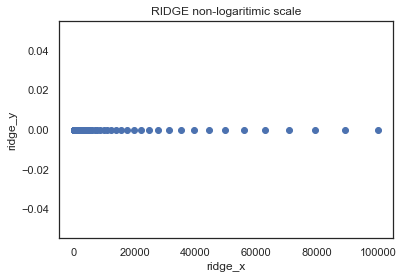

In [1219]:
# plot the RIDGE visualizatioin
ridgex = np.logspace(0,5, num=100)
ridgey = np.zeros(100)
# plot the values
plt.plot(ridgex, ridgey, 'o')
plt.xlabel('ridge_x')
plt.ylabel('ridge_y')
plt.title('RIDGE non-logaritimic scale')

Text(0.5, 1.0, 'RIDGE logarithimic scale')

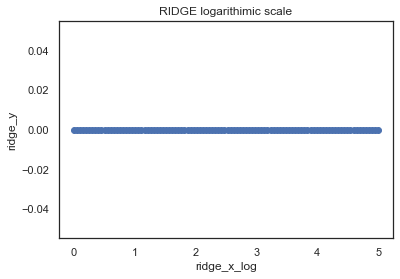

In [1220]:
#plot the log RIDGE visualization
ridgexlog = np.log10(ridgex)
ridgey = np.zeros(100)
# plot the values
plt.plot(ridgexlog, ridgey, 'o')
plt.xlabel('ridge_x_log')
plt.ylabel('ridge_y')
plt.title('RIDGE logarithimic scale')

In [1221]:
#Fit the RIDGE MODEL
alpha_cv.fit(Z_train, y_train)


RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [1222]:
#Evaluate the RIDGE MODEL
print(f'the Trained Ridge model is {alpha_cv.score(Z_train,y_train)}')
print(f'the Test Ridge model is {alpha_cv.score(Z_test,y_test)}')

the Trained Ridge model is 0.33974713606672746
the Test Ridge model is 0.3031510690777496


## Lasso Regression

In [1223]:
from sklearn.linear_model import Lasso, LassoCV

- lets reiterate the OLS score and Ridge score

In [1224]:
print(" OLS regression ".center(60, "="))
print(f'the OLS trained score is {ols.score(Z_train,y_train)}')
print(f" the OLS test score is {ols.score(Z_test,y_test)}")

print(" Ridge regression ".center(60, "="))
print(f'the Trained Ridge model is {alpha_cv.score(Z_train,y_train)}')
print(f'the Test Ridge model is {alpha_cv.score(Z_test,y_test)}')

====================== OLS regression ======================
the OLS trained score is 0.3764390062226828
 the OLS test score is 0.3006849883048991
===================== Ridge regression =====================
the Trained Ridge model is 0.33974713606672746
the Test Ridge model is 0.3031510690777496


In [1225]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.logspace(-3,1,100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV (alphas=lasso_alphas, cv = 5, max_iter=500)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train,y_train)



/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7179365806209717, tolerance: 0.25746207815275357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.935107040324283, tolerance: 0.25746207815275357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7464077798067592, tolerance: 0.25746207815275357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gracechong

LassoCV(alphas=array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03, 1.32194115e-03,
       1.45082878e-03, 1.59228279e-03, 1.74752840e-03, 1.91791026e-03,
       2.10490414e-03, 2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03, 4.03701726e-03,
       4.43062146e-03, 4.86260158e-03, 5.33669923e-03, 5.85702082e-03,
       6.42807312e-03, 7.05480231e-0...
       1.17681195e+00, 1.29154967e+00, 1.41747416e+00, 1.55567614e+00,
       1.70735265e+00, 1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00, 3.27454916e+00,
       3.59381366e+00, 3.94420606e+00, 4.32876128e+00, 4.75081016e+00,
       5.21400829e+00, 5.72236766e+00, 6.28029144e+00, 6.89261210e+00,
       7.56463328e+00, 8.30217568e+00, 9.11162756e+00, 1.00000000e+01]),
        cv=5, max_iter=500)

In [1226]:
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV (alphas=lasso_alphas, cv = 5, max_iter=500)

In [1227]:


# Fit model using best ridge alpha!
lasso_cv.fit(Z_train,y_train)

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7179365806209717, tolerance: 0.25746207815275357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.935107040324283, tolerance: 0.25746207815275357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7464077798067592, tolerance: 0.25746207815275357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gracechong

LassoCV(alphas=array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03, 1.32194115e-03,
       1.45082878e-03, 1.59228279e-03, 1.74752840e-03, 1.91791026e-03,
       2.10490414e-03, 2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03, 4.03701726e-03,
       4.43062146e-03, 4.86260158e-03, 5.33669923e-03, 5.85702082e-03,
       6.42807312e-03, 7.05480231e-0...
       1.17681195e+00, 1.29154967e+00, 1.41747416e+00, 1.55567614e+00,
       1.70735265e+00, 1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00, 3.27454916e+00,
       3.59381366e+00, 3.94420606e+00, 4.32876128e+00, 4.75081016e+00,
       5.21400829e+00, 5.72236766e+00, 6.28029144e+00, 6.89261210e+00,
       7.56463328e+00, 8.30217568e+00, 9.11162756e+00, 1.00000000e+01]),
        cv=5, max_iter=500)

In [1228]:
print(f'{lasso_cv.score(Z_train,y_train)}')
print(f'{lasso_cv.score(Z_test,y_test)}')

0.33421261373403355
0.28643701339061867


In [1229]:
print(" OLS regression ".center(60, "="))
print(f'the OLS trained score is {ols.score(Z_train,y_train)}')
print(f" the OLS test score is {ols.score(Z_test,y_test)}")

print(" Ridge regression ".center(60, "="))
print(f'the Trained Ridge model is {alpha_cv.score(Z_train,y_train)}')
print(f'the Test Ridge model is {alpha_cv.score(Z_test,y_test)}')

print(" Lasso regression ".center(60, "="))
print(f'the Trained Lasso model is {lasso_cv.score(Z_train,y_train)}')
print(f'the Test Lasso model is {lasso_cv.score(Z_test,y_test)}')

====================== OLS regression ======================
the OLS trained score is 0.3764390062226828
 the OLS test score is 0.3006849883048991
===================== Ridge regression =====================
the Trained Ridge model is 0.33974713606672746
the Test Ridge model is 0.3031510690777496
===================== Lasso regression =====================
the Trained Lasso model is 0.33421261373403355
the Test Lasso model is 0.28643701339061867


In [1230]:
lasso_cv.alpha_

0.0036783797718286343